# Data Science Intern @ LetsGrowMore
# Author : Mihir Kudale
# BEGINNER LEVEL TASK 01
###  Iris Flowers Classification ML Project :
This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

### Loading the Dataset

In [2]:
iris=pd.read_csv('iris.csv')

In [3]:
iris.rename(columns={"Unnamed: 0":"Id", "Sepal.Length":"SepalLengthCm", "Sepal.Width":"SepalWidthCm", "Petal.Length":"PetalLengthCm", "Petal.Width":"PetalWidthCm" },inplace=True)

In [4]:
iris.shape

(150, 6)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000



### To find the no. of flowers present in each species

In [7]:
iris["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### Data Visualisation

#### Scatter Plot:

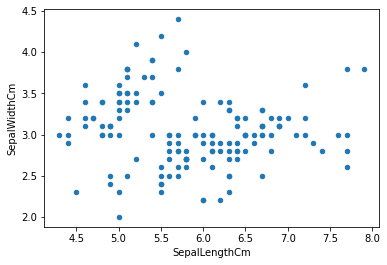

In [11]:
iris.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm' )
plt.show()

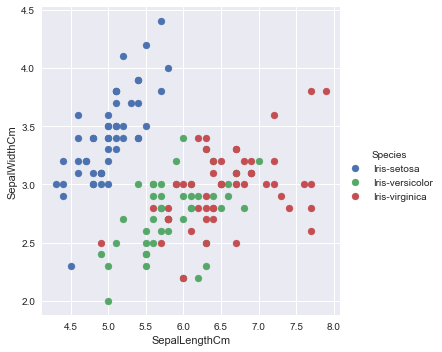

In [12]:
plt.style.use('seaborn')
sns.FacetGrid(iris,hue='Species',height=5).\
            map(plt.scatter,'SepalLengthCm','SepalWidthCm')\
            .add_legend()

Here, we can observe that we can differentiate Setosa flowers from other type of flowers.

Whereas, Versicolor and Vergina are overlapping with each other.

#### Pair Plot:

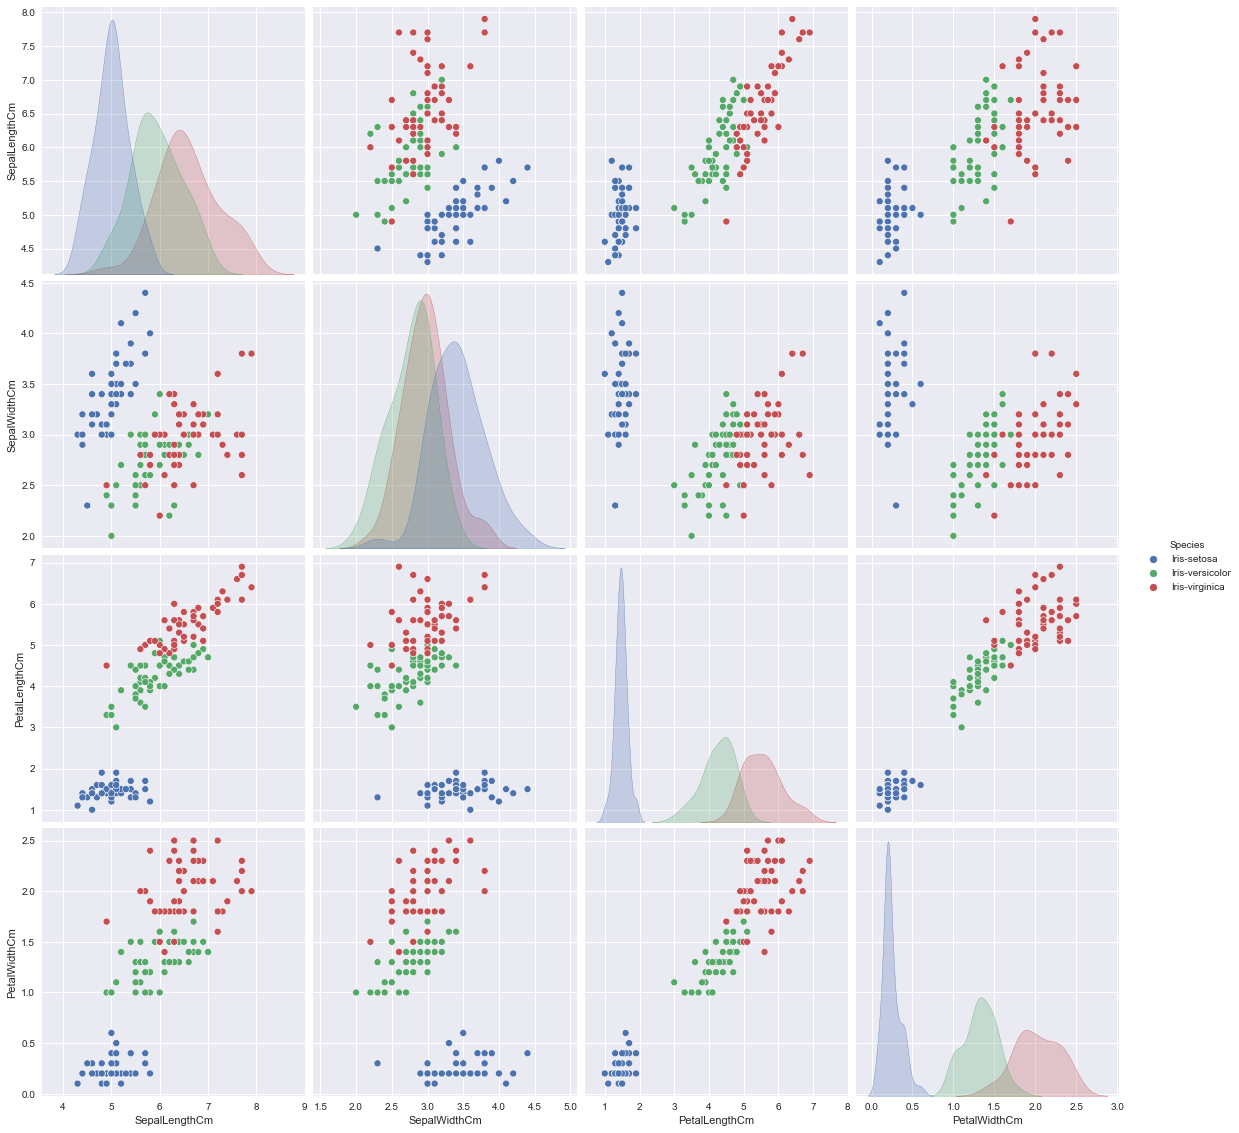

In [13]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", height=4)

#### Box Plot:

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

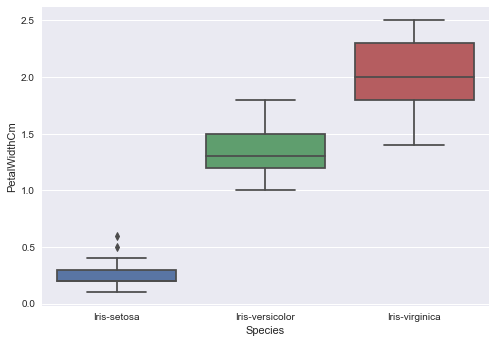

In [14]:
sns.boxplot(x="Species", y="PetalWidthCm", data=iris)

#### Violin Plot:

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

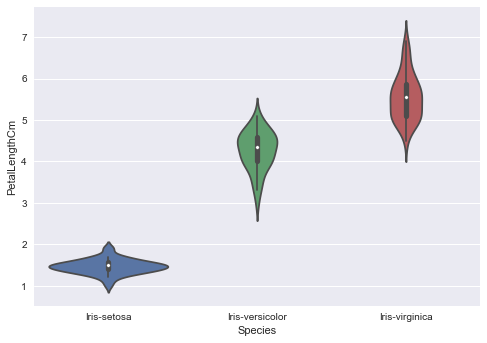

In [15]:
sns.violinplot(x='Species', y='PetalLengthCm', data=iris)

#### Heatmap:

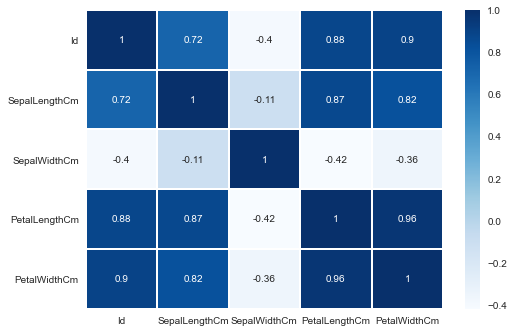

In [16]:
sns.heatmap(iris.corr(),cmap='Blues',annot=True,linewidths=1)
plt.show()

In [17]:
X=iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=iris['Species']

#### Training and Testing Data

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


### Machine Learning Models

#### Support Vector Machine

In [20]:
from sklearn import svm
model=svm.SVC()
model.fit(X_train,y_train)

SVC()

In [21]:
y_pred=model.predict(X_test)

print("Accuracy:",accuracy_score(y_pred,y_test))

Accuracy: 0.9666666666666667


#### Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=16)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=16)

In [23]:
y_pred=model.predict(X_test)

print("Accuracy:",accuracy_score(y_pred,y_test))

Accuracy: 0.9666666666666667


#### Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
y_pred=model.predict(X_test)

print("Accuracy:",accuracy_score(y_pred,y_test))

Accuracy: 0.9666666666666667


#### K Nearest Neighbors Classifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [27]:
y_pred=model.predict(X_test)

print("Accuracy:",accuracy_score(y_pred,y_test))

Accuracy: 0.9666666666666667


#### Naive Bayes Classifier

In [28]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [29]:
y_pred=model.predict(X_test)

print("Accuracy:",accuracy_score(y_pred,y_test))

Accuracy: 1.0


#### Conclusion: We can observe here that Naive Bayes gives 100% accuracy.